## V4(+arima+ym)_lightGBM_Kfold5

In [1]:
import os, sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# path 설정
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("")))))
print(sys.path[-1])

d:\base\boostcamp\apart\level2-competitiveds-recsys-06


In [2]:
raw_path: str = "../../../data/raw"
processed_path: str = "../../../data/processed"
submission_path: str = "../../../data/submission"

In [3]:
df: pd.DataFrame = pd.read_csv(os.path.join(processed_path,"v4_baek+recent+rank.csv"))

### Arima_Deposit_Index 추가

In [4]:
# ARIMA 인덱스 추가
from src.pre_process.deposit.arima_deposit_index import ArimaDepositIndexFeature
interest = pd.read_csv(os.path.join(raw_path, "interestRate.csv"))
df = ArimaDepositIndexFeature(df, interest).get_data()

d:\Program\Dev\ANACONDA\envs\apart\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [5]:
df

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,...,nearest_park_distance,nearest_park_within_500.0m,has_park_within_500.0m,apt_deposit_rank,apt_area_deposit_rank,original_index,recent_deposit,interest_rate,diff_interest_rate,arima_deposit_index
0,0,84.9981,201906,25,2,9,2019,37.054314,127.045216,0,...,498.618918,1,1,7683,29300,0,NaN,1.78,-0.07,102.180354
1,1,84.9981,202003,26,2,20,2019,37.054314,127.045216,1,...,498.618918,1,1,7683,29300,1,17000.0,1.26,-0.17,105.586089
2,2,84.9981,202003,28,2,8,2019,37.054314,127.045216,1,...,498.618918,1,1,7683,29300,2,23000.0,1.26,-0.17,105.586089
3,3,59.3400,201907,15,2,1,1986,36.964647,127.055847,33,...,169.839678,3,1,18366,58901,3,NaN,1.68,-0.10,103.855832
4,4,59.8100,201904,12,2,6,1995,36.972390,127.084514,24,...,382.401815,1,1,18369,58863,4,NaN,1.85,-0.09,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,150167,115.5101,202402,27,0,17,2010,37.528394,126.659398,14,...,398.113485,1,1,6088,25360,150167,37000.0,3.62,-0.04,142.092659
1951396,150168,142.8738,202403,2,0,4,2010,37.528394,126.659398,14,...,398.113485,1,1,6088,17911,150168,43000.0,3.59,-0.03,142.295862
1951397,150169,142.8738,202403,16,1,13,2010,37.528394,126.659398,14,...,398.113485,1,1,6088,17911,150169,43000.0,3.59,-0.03,142.295862
1951398,150170,114.9285,202403,22,1,2,2010,37.528394,126.659398,14,...,398.113485,1,1,6088,24128,150170,32500.0,3.59,-0.03,142.295862


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951400 entries, 0 to 1951399
Data columns (total 37 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   index                                 int64  
 1   area_m2                               float64
 2   contract_year_month                   int64  
 3   contract_day                          int64  
 4   contract_type                         int64  
 5   floor                                 int64  
 6   built_year                            int64  
 7   latitude                              float64
 8   longitude                             float64
 9   age                                   int64  
 10  deposit                               float64
 11  _type                                 object 
 12  apt_idx                               int64  
 13  area                                  float64
 14  grid_id                               float64
 15  nearest_subway_

In [7]:
pd.set_option('display.max_columns', None)
df[df['apt_idx']==15571]

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,_type,apt_idx,area,area_price,area_m2_price,grid_id,nearest_subway_distance,nearest_subway_idx,num_subway_within_1km,category_interchange_within_1km,num_subway_within_500m,category_interchange_within_500m,nearest_elementary_school_distance,nearest_elementary_school_within_1km,has_elementary_school_within_1km,nearest_middle_school_distance,nearest_middle_school_within_1km,has_middle_school_within_1km,nearest_high_school_distance,nearest_high_school_within_1km,has_high_school_within_1km,nearest_park_distance,nearest_park_within_500.0m,has_park_within_500.0m,apt_deposit_rank,apt_area_deposit_rank,original_index,recent_deposit,interest_rate,diff_interest_rate,arima_deposit_index
1260709,1260709,273.96,202111,12,0,14,2020,37.525956,127.054237,1,930000.0,train,15571,83.0,11204.819277,3394.656154,91115.932685,737,367,1,1,0,0,841.746119,2,1,883.965127,1,1,947.066814,2,1,477.939202,1,1,2,2,1260709,NaN,1.55,0.26,142.568382
1406833,1406833,273.96,202210,13,0,18,2020,37.525956,127.054237,2,1100000.0,train,15571,83.0,13253.012048,4015.184698,91115.932685,737,367,1,1,0,0,841.746119,2,1,883.965127,1,1,947.066814,2,1,477.939202,1,1,2,2,1406833,930000.0,3.98,0.58,130.098114
1539384,1539384,273.96,202304,20,1,2,2020,37.525956,127.054237,3,570000.0,train,15571,83.0,6867.469880,2080.595707,91115.932685,737,367,1,1,0,0,841.746119,2,1,883.965127,1,1,947.066814,2,1,477.939202,1,1,2,2,1539384,1100000.0,3.44,-0.12,122.690711
1542638,1542638,273.96,202307,7,2,14,2020,37.525956,127.054237,3,1000000.0,train,15571,83.0,12048.192771,3650.167908,91115.932685,737,367,1,1,0,0,841.746119,2,1,883.965127,1,1,947.066814,2,1,477.939202,1,1,2,2,1542638,570000.0,3.69,-0.01,128.762531


## Corr

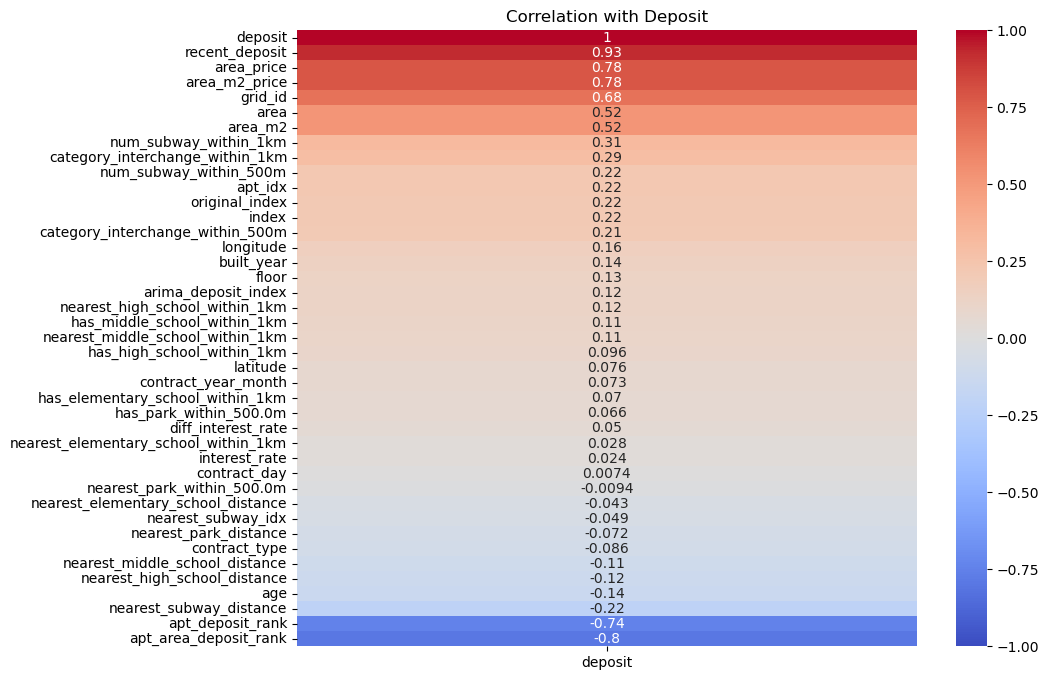

In [14]:
# deposit과 숫자형 컬럼의 상관관계 계산
correlation_matrix = df.drop(columns=['_type']).corr()

# deposit과의 상관관계 추출
deposit_corr = correlation_matrix[['deposit']].sort_values(by='deposit', ascending=False)

# 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(deposit_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Deposit')
plt.show()

In [6]:
# df['date'] = pd.to_datetime(df['contract_year_month'].astype(str) + df['contract_day'].astype(str).str.zfill(2), format='%Y%m%d')
# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month
# df['day'] = df['date'].dt.day

### 컬럼 정리

In [8]:
df.columns

Index(['index', 'area_m2', 'contract_year_month', 'contract_day',
       'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'age',
       'deposit', '_type', 'apt_idx', 'area', 'area_price', 'area_m2_price',
       'grid_id', 'nearest_subway_distance', 'nearest_subway_idx',
       'num_subway_within_1km', 'category_interchange_within_1km',
       'num_subway_within_500m', 'category_interchange_within_500m',
       'nearest_elementary_school_distance',
       'nearest_elementary_school_within_1km',
       'has_elementary_school_within_1km', 'nearest_middle_school_distance',
       'nearest_middle_school_within_1km', 'has_middle_school_within_1km',
       'nearest_high_school_distance', 'nearest_high_school_within_1km',
       'has_high_school_within_1km', 'nearest_park_distance',
       'nearest_park_within_500.0m', 'has_park_within_500.0m',
       'apt_deposit_rank', 'apt_area_deposit_rank', 'original_index',
       'recent_deposit', 'interest_rate', 'diff_interest_rate',

In [10]:
# df['month_sin'] = np.sin(2 * np.pi * df['date'].dt.month / 12)
# df['month_cos'] = np.cos(2 * np.pi * df['date'].dt.month / 12)

In [9]:
# # 이자율 제거 columns = ['apt_idx', 'index', 'area_m2', 'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'deposit', '_type', 'grid_id', 'diff_interest_rate', 'apt_deposit_rank', 'apt_area_deposit_rank', 'recent_deposit']
# # 기본 columns = ['apt_idx', 'index', 'area_m2', 'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'deposit', '_type', 'grid_id', 'interest_rate', 'diff_interest_rate', 'apt_deposit_rank', 'apt_area_deposit_rank', 'recent_deposit']
# columns = ['apt_idx', 'index', 'area_m2', 'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'deposit', '_type', 'grid_id', 'interest_rate', 'diff_interest_rate', 'apt_deposit_rank', 'apt_area_deposit_rank', 'recent_deposit', 'nearest_subway_distance', 'num_subway_within_1km', 'category_interchange_within_1km', 'num_subway_within_500m', 'category_interchange_within_500m', 'year','month', 'day', 'month_sin', 'month_cos']

# df = df[columns]

# temp_train_df = df[df["_type"]=='train']
# test_df = df[df["_type"]=='test']
columns_to_drop = ['area_m2_price', 'area_price', 'year_month', 'contract_ymd', 'original_index', 'interest_rate', 'diff_interest_rate']
df = df.drop(columns=columns_to_drop, errors='ignore')

temp_train_df = df[df["_type"]=='train']
test_df = df[df["_type"]=='test']

## K-Fold CV(k=5) 적용 LightGBM

In [10]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 학습에 사용할 특징 열
feature_columns = [col for col in temp_train_df.columns if col not in ['deposit', '_type', 'index']]

# 학습 데이터 준비
X = temp_train_df[feature_columns]
y = temp_train_df['deposit']

# 결측치 대체
X['recent_deposit'] = X['recent_deposit'].fillna(39000)

# LightGBM 파라미터 설정
params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'seed': 42
}

# 콜백 함수 정의
def print_evaluation(period=10):
    def callback(env):
        if (env.iteration + 1) % period == 0:
            train_mae = env.evaluation_result_list[0][2]
            val_mae = env.evaluation_result_list[1][2]
            print(f"[{env.iteration + 1}] Train MAE: {train_mae:.4f}, Val MAE: {val_mae:.4f}")
    return callback

# 5-fold 교차 검증 설정
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# 각 폴드의 예측 결과를 저장할 리스트
oof_predictions = np.zeros(len(X))
test_predictions = np.zeros(len(test_df))

# 교차 검증 수행
for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"\nFold {fold}")
    
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)
    
    model = lgb.train(
        params, 
        dtrain, 
        num_boost_round=1000, 
        valid_sets=[dtrain, dval], 
        callbacks=[print_evaluation(period=100)]
    )
    
    # 검증 세트에 대한 예측
    oof_predictions[val_idx] = model.predict(X_val)
    
    # 테스트 세트에 대한 예측
    test_predictions += model.predict(test_df[feature_columns]) / n_folds

# 전체 검증 세트에 대한 MAE 계산
oof_mae = mean_absolute_error(y, oof_predictions)
print(f"\nOverall OOF MAE: {oof_mae:.4f}")

# 테스트 세트에 대한 최종 예측 결과
y_pred = test_predictions

print("\nTraining completed.")

C:\Users\shgkd\AppData\Local\Temp\ipykernel_10756\1515828313.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['recent_deposit'] = X['recent_deposit'].fillna(39000)



Fold 1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4208
[LightGBM] [Info] Number of data points in the train set: 1440982, number of used features: 34
[LightGBM] [Info] Start training from score 38183.560818
[100] Train MAE: 4153.9867, Val MAE: 4143.0837
[200] Train MAE: 4022.6600, Val MAE: 4022.5683
[300] Train MAE: 3982.6202, Val MAE: 3991.0232
[400] Train MAE: 3951.0093, Val MAE: 3965.9803
[500] Train MAE: 3929.4046, Val MAE: 3950.7977
[600] Train MAE: 3911.7031, Val MAE: 3939.1973
[700] Train MAE: 3894.3963, Val MAE: 3927.6225
[800] Train MAE: 3877.9887, Val MAE: 3916.3989
[900] Train MAE: 3862.4342, Val MAE: 3906.3726
[1000] Train MAE: 3847.0097, Val MAE: 3895.6867

Fold 2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031320 second

### Feature Importance

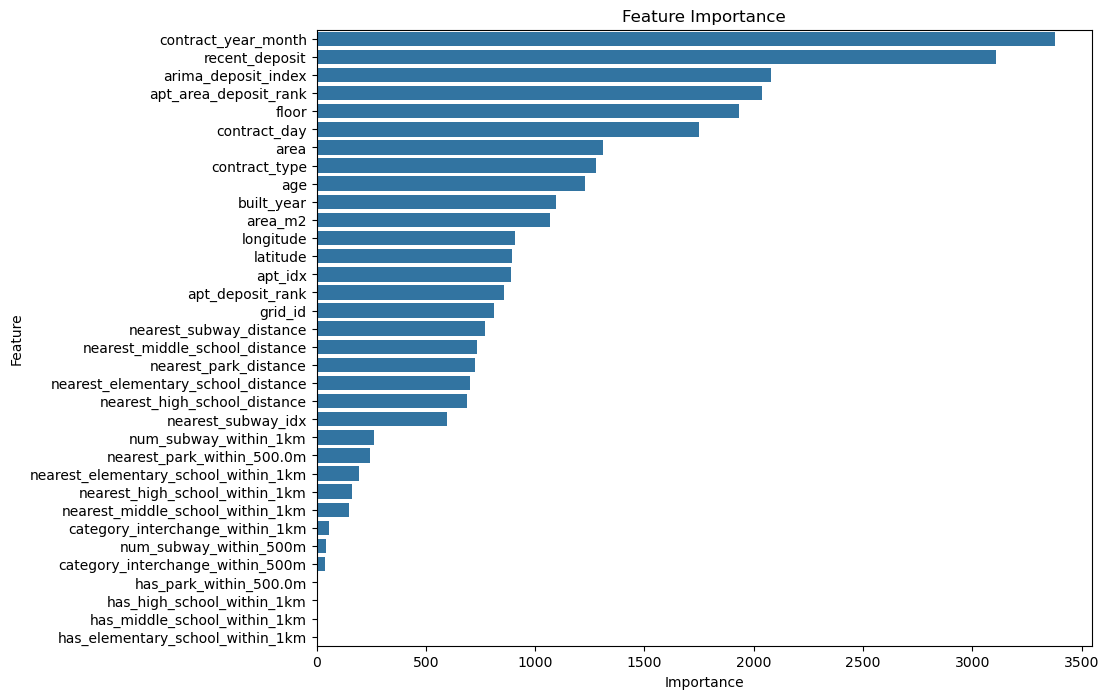

In [11]:
# LightGBM 모델의 피처 중요도 추출
feature_importance = model.feature_importance()

# 피처 중요도를 DataFrame으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importance
})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [17]:
y_pred

array([21977.37153853,  7206.5669589 ,  5968.93015422, ...,
       44995.86286808, 37670.42992587, 37453.77840617])

In [18]:
# Create a DataFrame from y_pred with the same index as X_test
y_pred_df = pd.DataFrame(y_pred, index=range(len(y_pred)), columns=['deposit'])

# Display the DataFrame
y_pred_df.index.name = 'index'
y_pred_df

,deposit
index,
0,21977.371539
1,7206.566959
2,5968.930154
3,5772.111791
4,5908.373720
...,...
150167,37222.888067
150168,43892.423214
150169,44995.862868


In [21]:
y_pred_df['deposit'].mean()

np.float64(39110.92921589136)

In [22]:
submission_path: str = "../../../data/submission"
y_pred_df.to_csv(os.path.join(submission_path, "V4+arima+ym_lightGBM_Kfold5.csv"), index=True)

In [23]:
xgb_submission = pd.read_csv(os.path.join(submission_path, "v4_xgboost_add(arima).csv"))

In [24]:
# Calculate the average of the deposit columns from xgb6 and lgb1
average_deposit = (xgb_submission['deposit'] + y_pred_df['deposit']) / 2

# Create a new DataFrame with the same shape
average_deposit_df = pd.DataFrame({
    'index': xgb_submission['index'],
    'deposit': average_deposit
})

# Display the new DataFrame
average_deposit_df

,index,deposit
0,0,21896.995769
1,1,7398.296179
2,2,6438.705327
3,3,6443.635745
4,4,6551.438060
...,...,...
150167,150167,37420.731033
150168,150168,43827.516607
150169,150169,44980.271434
150170,150170,37527.806963


In [25]:
average_deposit_df.to_csv(os.path.join(submission_path, "xgb+lgbm(v4+arima).csv"), index=True)